# 15. Prepoznavanje cifara

Baza se sastoji od 70000 slika cifara pisanih rukom. 

Podaci su razdvojeni na deo za obuku i deo za testiranje. 

Sve slike su predobrađene u smislu ujednačenja veličine slika i centriranja napisane cifre. 

Treba napraviti algoritam koji će na osnovu slike moći da prepozna koja cifra je napisana.

https://medium.com/machine-learning-algorithms-from-scratch/digit-recognition-from-0-9-using-deep-neural-network-from-scratch-8e6bcf1dbd3

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl

from sklearn.model_selection import train_test_split, StratifiedKFold, LeaveOneOut
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC

In [3]:
#podaci su vec uredjeni
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")


In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
np.array(df.groupby("label").count().iloc[:, :1]).transpose()[0]

array([4132, 4684, 4177, 4351, 4072, 3795, 4137, 4401, 4063, 4188])

<BarContainer object of 10 artists>

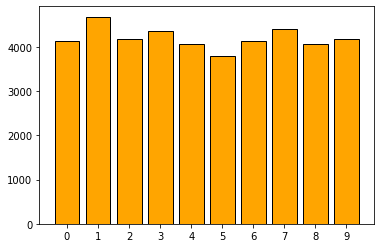

In [7]:
plt.xticks(range(10))
plt.bar(range(10), df.groupby("label").count().iloc[:, :1].transpose().iloc[0], color = "orange" , edgecolor = "black")

In [8]:
# pl.gray()
# pl.matshow(np.array(df.iloc[10])[1:].reshape(28,28))
# pl.show()

<BarContainer object of 10 artists>

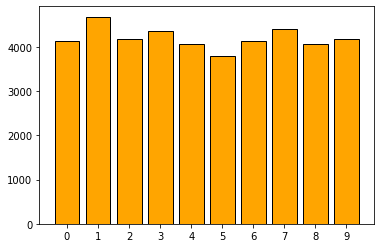

In [9]:
plt.xticks(range(10))
plt.bar(range(10), df.groupby("label").count().iloc[:, :1].transpose().iloc[0], color = "orange" , edgecolor = "black")

<BarContainer object of 10 artists>

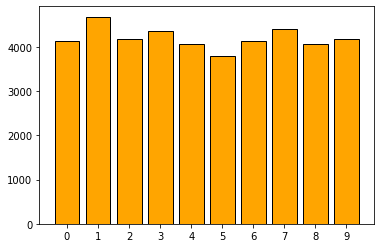

In [10]:
plt.xticks(range(10))
plt.bar(range(10), df.groupby("label").count().iloc[:, :1].transpose().iloc[0], color = "orange" , edgecolor = "black")

In [11]:
# pl.gray()
# pl.matshow(np.array(df_test.iloc[7]).reshape(28,28))
# pl.show()

In [12]:
test = np.array(df.iloc[9])[1:].reshape(28, 28)
out = np.zeros(shape=(14, 14))
for i in range(14):
    for j in range(14):
        out[i, j] = ((test[i * 2, j * 2] + test[i * 2 + 1, j * 2] + test[i * 2, j * 2 + 1] + test[i * 2 + 1, j * 2 + 1]))

# pl.gray()
# pl.matshow(out)
# pl.show()

In [13]:
out2 = np.zeros(shape=(7, 7))
for i in range(7):
    for j in range(7):
        for x in range(4):
            for y in range(4):
                out2[i, j] += test[i * 4 + x, j * 4 + y]

# pl.gray()
# pl.matshow(out2)
# pl.show()

In [14]:
# moze i jednostavnije bez reshape
def reduce_img(img):
    test = np.array(img).reshape(28, 28)
    out = np.zeros(shape=(14, 14))
    for i in range(14):
        for j in range(14):
            out[i, j] = (test[i * 2, j * 2] + test[i * 2 + 1, j * 2] + test[i * 2, j * 2 + 1] + test[i * 2 + 1, j * 2 + 1]) / 1024
            
    return out.reshape(1, 196)

In [15]:
non_reduced = df.iloc[:, 1:].copy()
x_train_non_cut = np.zeros(shape=(non_reduced.shape[0], 14 * 14))

non_reduced
for i in range(42000):
    x_train_non_cut[i] = reduce_img(non_reduced.iloc[i])


In [16]:
# pl.gray()
# pl.matshow(x_train_non_cut[15].reshape(14,14))
# pl.show()

In [17]:
x_train = np.zeros(shape=(42000, 10 * 10))

for i in range(42000):
    tmp = x_train_non_cut[i].reshape(14, 14)
    x_train[i] = tmp[2:12, 2:12].reshape(1, 100)

In [18]:
# pl.gray()
# pl.matshow(x_train[99].reshape(10,10))
# pl.show()

In [19]:
x_train
y_train = df.iloc[:, 0].copy()
print(x_train.shape)
print(y_train.unique())
print(y_train)
x_train.shape

(42000, 100)
[1 0 4 7 3 5 8 9 2 6]
0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64


(42000, 100)

In [20]:
def tacnost_po_klasi(mat_konf, klase):
    tacnost_i = []
    N = mat_konf.shape[0]
    for i in range(N):
        j = np.delete(np.array(range(N)), i) 
        TP = mat_konf[i, i]
        F = sum(mat_konf[i, j]) + sum(mat_konf[j, i])
        TN = sum(sum(mat_konf)) - F - TP
        tacnost_i.append((TP + TN) / sum(sum(mat_konf)))
        print('Za klasu ', klase[i], ' tacnost je: ', tacnost_i[i])
    tacnost_avg = np.mean(tacnost_i)
    return tacnost_avg

def osetljivost_po_klasi(mat_konf, klase): 
    osetljivost_i = []
    N = mat_konf.shape[0]
    for i in range(N):
        j = np.delete(np.array(range(N)), i) 
        TP = mat_konf[i, i]
        FN = sum(mat_konf[i, j])
        osetljivost_i.append(TP / (TP + FN))
        print('Za klasu ', klase[i], ' osetljivost je: ', osetljivost_i[i])
    osetljivost_avg = np.mean(osetljivost_i)
    return osetljivost_avg

def specificnost_po_klasi(mat_konf, klase): 
    specificnost_i = []
    N = mat_konf.shape[0]
    for i in range(N):
        j = np.delete(np.array(range(N)), i) 
        TP = mat_konf[i, i]
        FN = sum(mat_konf[i, j])
        F = sum(mat_konf[i, j]) + sum(mat_konf[j, i])
        TN = sum(sum(mat_konf)) - F - TP
        FP = F - FN
        specificnost_i.append(TN / (TN + FP))
        print('Za klasu ', klase[i], ' specificnost je: ', specificnost_i[i])
    return np.mean(specificnost_i)

def preciznost_po_klasi(mat_konf, klase): 
    preciznost_i = []
    N = mat_konf.shape[0]
    for i in range(N):
        j = np.delete(np.array(range(N)), i) 
        TP = mat_konf[i, i]
        FN = sum(mat_konf[i, j])
        F = sum(mat_konf[i, j]) + sum(mat_konf[j, i])
        TN = sum(sum(mat_konf)) - F - TP
        FP = F - FN
        preciznost_i.append(TP / (TP + FP))
        print('Za klasu ', klase[i], ' preciznost je: ', preciznost_i[i])
    return np.mean(preciznost_i)

$$$$$$$$$$
 SOLVER: {solver_fun}
##########
 ACTIVATION: {activation_fun}
layer: (64, 64)
0
1
2
3
4
konacna matrica konfuzije: 



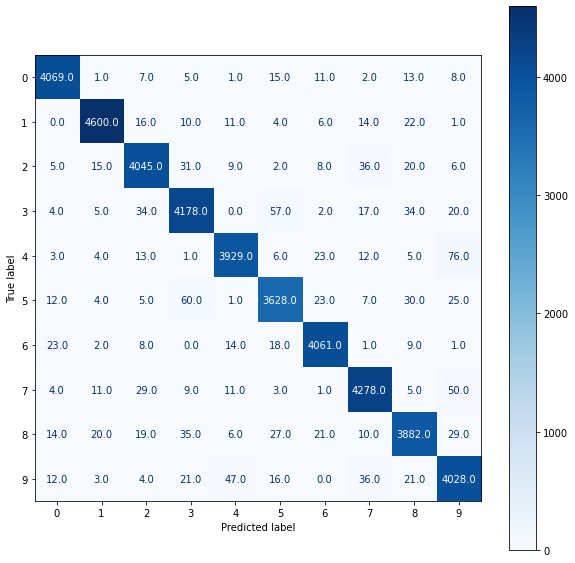

procenat tacno predvidjenih: 0.969
Za klasu  0  osetljivost je:  0.9847531461761858
Za klasu  1  osetljivost je:  0.982066609735269
Za klasu  2  osetljivost je:  0.9683983720373474
Za klasu  3  osetljivost je:  0.9602390255113767
Za klasu  4  osetljivost je:  0.9648821218074656
Za klasu  5  osetljivost je:  0.9559947299077733
Za klasu  6  osetljivost je:  0.9816291999033115
Za klasu  7  osetljivost je:  0.9720518064076347
Za klasu  8  osetljivost je:  0.9554516367216342
Za klasu  9  osetljivost je:  0.9617956064947469
prosecna osetljivost je: 0.9687262254702744
layer: (64, 32)
5
6
7
8
9
konacna matrica konfuzije: 



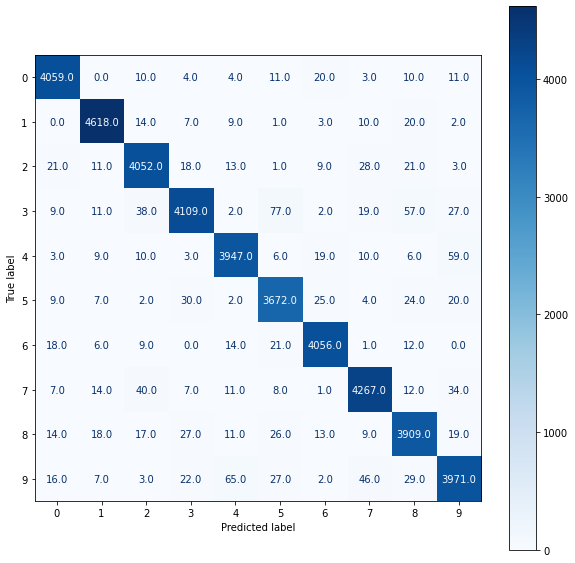

procenat tacno predvidjenih: 0.9680952380952381
Za klasu  0  osetljivost je:  0.9823330106485963
Za klasu  1  osetljivost je:  0.9859094790777113
Za klasu  2  osetljivost je:  0.9700742159444578
Za klasu  3  osetljivost je:  0.9443806021604229
Za klasu  4  osetljivost je:  0.9693025540275049
Za klasu  5  osetljivost je:  0.9675889328063241
Za klasu  6  osetljivost je:  0.9804205946337926
Za klasu  7  osetljivost je:  0.9695523744603499
Za klasu  8  osetljivost je:  0.9620969726802855
Za klasu  9  osetljivost je:  0.9481852913085005
prosecna osetljivost je: 0.9679844027747947


In [21]:
hidden_layer_sizes_bunch = [(64, 64), (64, 32)]
activation_bunch = ["relu"]
solver_bunch = ["adam"]

i = 0
for solver_fun in solver_bunch:
    print(f"$" * 10 + "\n SOLVER: {solver_fun}")
    for activation_fun in activation_bunch:
        print(f"#" * 10 + "\n ACTIVATION: {activation_fun}")
        for layer in hidden_layer_sizes_bunch:
            print(f"layer: {layer}")    
            kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
            indexes = kf.split(x_train, y_train)
            fin_conf_mat = np.zeros((len(np.unique(y_train)), len(np.unique(y_train))))

            for train_index, test_index in indexes:
                print(i)
                i += 1
                classifier = MLPClassifier(hidden_layer_sizes= layer, activation=activation_fun,
                                            solver=solver_fun, batch_size=50, learning_rate='adaptive', 
                                            learning_rate_init=0.001, max_iter=100, shuffle=True,
                                            random_state=42, early_stopping=True, n_iter_no_change=10, 
                                            validation_fraction=0.1, verbose=False)
                classifier.fit(x_train[train_index], y_train[train_index])
                y_pred = classifier.predict(x_train[test_index])
                fin_conf_mat += confusion_matrix(y_train[test_index], y_pred)
            print('konacna matrica konfuzije: \n')
            disp = ConfusionMatrixDisplay(confusion_matrix=fin_conf_mat, display_labels=classifier.classes_)
            cm = confusion_matrix(np.arange(25), np.arange(25))
            fig, ax = plt.subplots(figsize=(10, 10))
            disp.plot(ax=ax, cmap="Blues", values_format='')
            plt.show()

            print(f"procenat tacno predvidjenih: {sum(np.diag(fin_conf_mat)) / sum(sum(fin_conf_mat))}")
            print(f"prosecna osetljivost je: {osetljivost_po_klasi(fin_conf_mat, range(10))}")

$$$$$$$$$$ komsije: 1
##########
 METRIC: dice


/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


0.9134523809523809


/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


0.9196428571428571


/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


0.9203571428571429


/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


0.9186904761904762


/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


0.9215476190476191
procenat tacno predvidjenih: 0.9187380952380952
finalna matrica


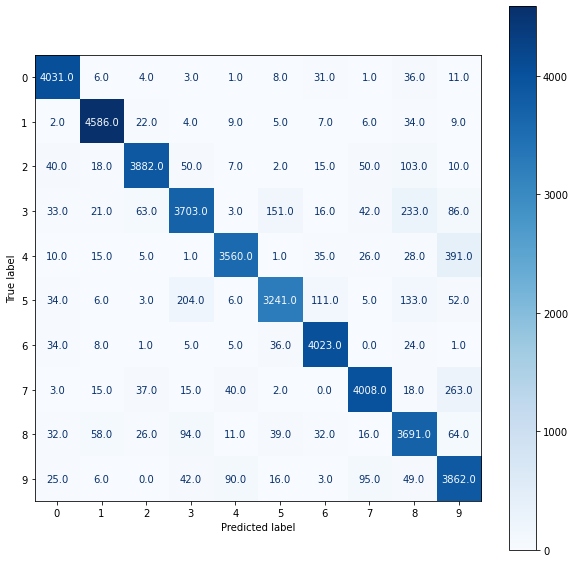

$$$$$$$$$$ komsije: 2
##########
 METRIC: dice


/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


0.9107142857142857


/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


0.9207142857142857


/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


0.9215476190476191


/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


0.9185714285714286


/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


0.9185714285714286
procenat tacno predvidjenih: 0.9180238095238096
finalna matrica


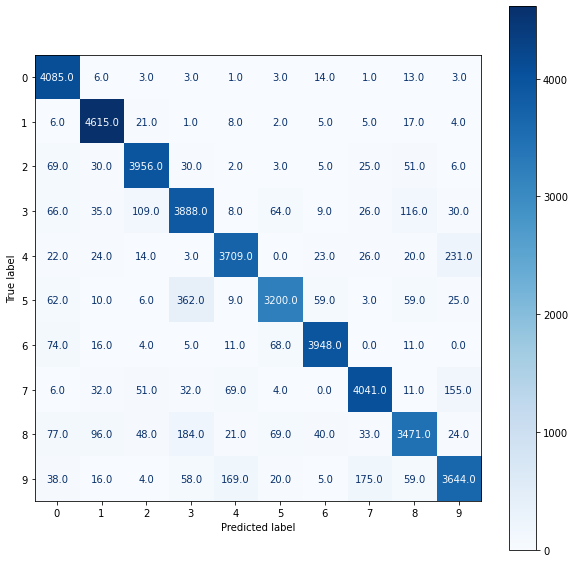

$$$$$$$$$$ komsije: 3
##########
 METRIC: dice


/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


0.9215476190476191


/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


0.9267857142857143


/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


0.9254761904761905


/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


0.9238095238095239


/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


0.9276190476190476
procenat tacno predvidjenih: 0.925047619047619
finalna matrica


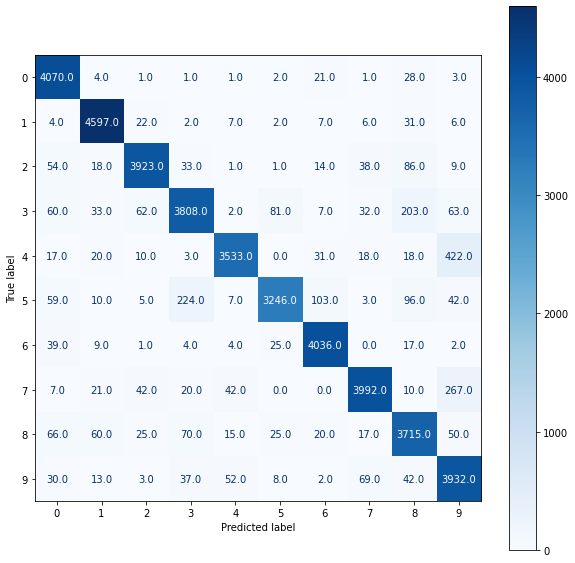

$$$$$$$$$$ komsije: 4
##########
 METRIC: dice


/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


0.9252380952380952


/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


0.9310714285714285


/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


0.9289285714285714


/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


0.929404761904762


/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


0.93
procenat tacno predvidjenih: 0.9289285714285714
finalna matrica


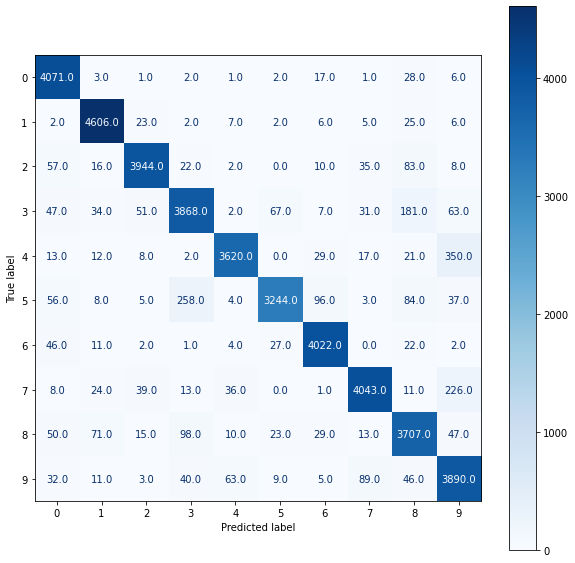

$$$$$$$$$$ komsije: 5
##########
 METRIC: dice


/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


0.9230952380952381


/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


0.9275


/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


0.9246428571428571


/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


0.9298809523809524


/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


0.929047619047619
procenat tacno predvidjenih: 0.9268333333333333
finalna matrica


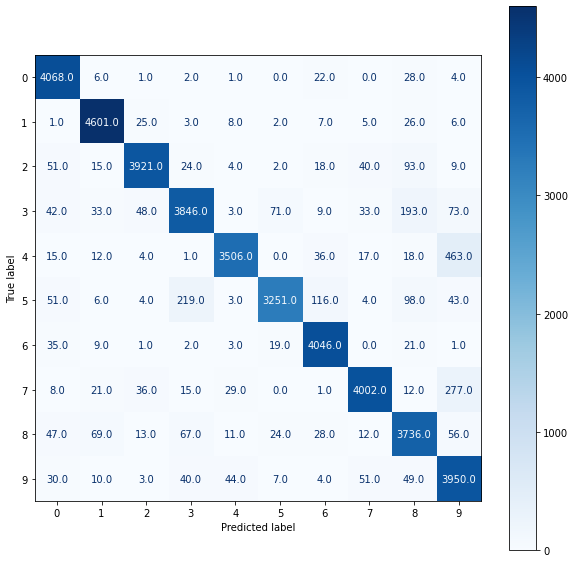

$$$$$$$$$$ komsije: 6
##########
 METRIC: dice


/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


0.9255952380952381


/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


0.9313095238095238


/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


0.929404761904762


/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


0.9286904761904762


/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


0.9288095238095239
procenat tacno predvidjenih: 0.9287619047619048
finalna matrica


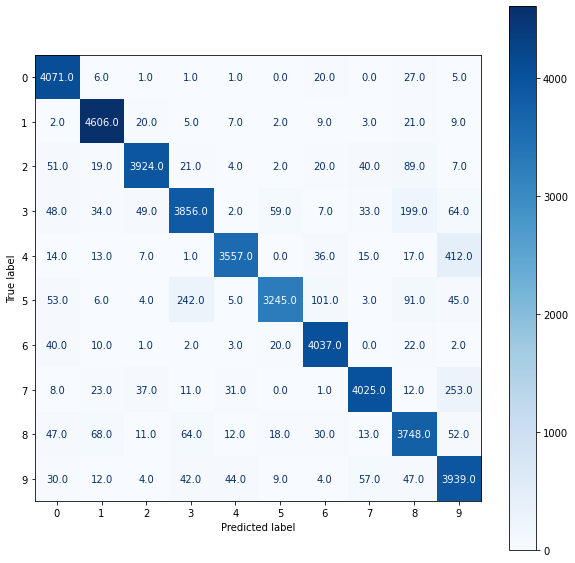

$$$$$$$$$$ komsije: 7
##########
 METRIC: dice


/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


0.9217857142857143


/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


0.9285714285714286


/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


0.9278571428571428


/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


0.9257142857142857


/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


0.9286904761904762
procenat tacno predvidjenih: 0.9265238095238095
finalna matrica


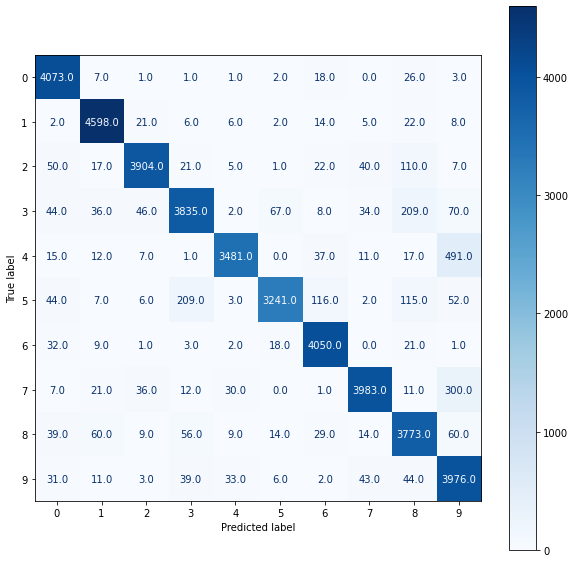

$$$$$$$$$$ komsije: 8
##########
 METRIC: dice


/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


0.924047619047619


/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


0.9308333333333333


/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


0.9284523809523809


/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


0.929047619047619


/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


0.9291666666666667
procenat tacno predvidjenih: 0.9283095238095238
finalna matrica


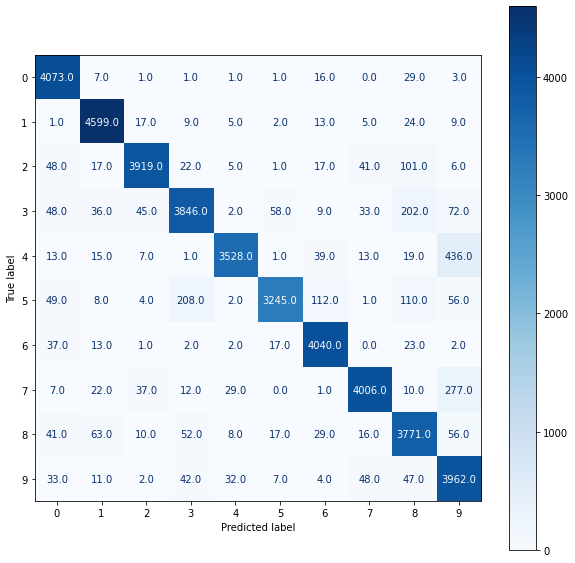

$$$$$$$$$$ komsije: 9
##########
 METRIC: dice


/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


0.9205952380952381


/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


0.9270238095238095


/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


0.9255952380952381


/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


0.9261904761904762


/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


0.9267857142857143
procenat tacno predvidjenih: 0.9252380952380952
finalna matrica


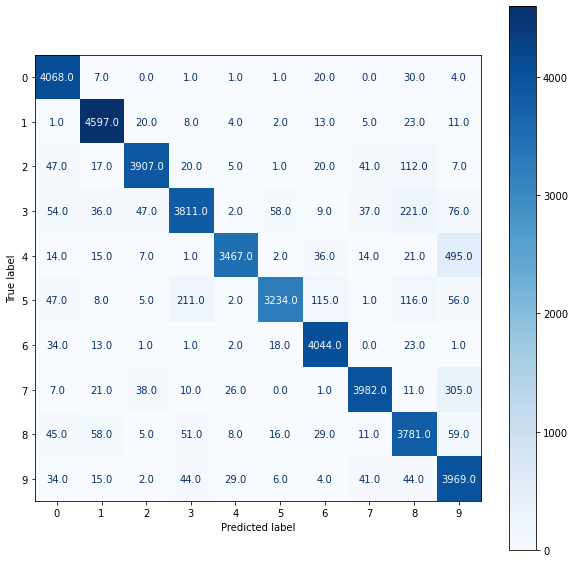

$$$$$$$$$$ komsije: 10
##########
 METRIC: dice


/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


0.9226190476190477


/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


0.929047619047619


/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


0.9260714285714285


/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


0.9277380952380953


/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)
/home/todorcevicm/.local/lib/python3.10/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


0.9278571428571428
procenat tacno predvidjenih: 0.9266666666666666
finalna matrica


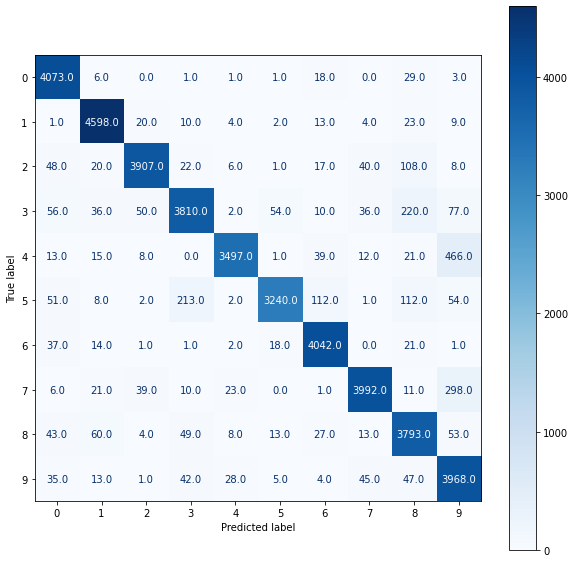

In [24]:
metric_batch = ["dice"]

for n in range(10):
    print("$" * 10 + " komsije: " + str(n + 1))
    for metric in metric_batch:
        print("#" * 10 + "\n METRIC: " + metric)
        kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        indexes = kf.split(x_train, y_train)
        fin_conf_mat = np.zeros((len(np.unique(y_train)), len(np.unique(y_train))))
        for train_index, test_index in indexes: 
            classifier = KNeighborsClassifier(n_neighbors=n + 1, metric=metric)
            classifier.fit(x_train[train_index], y_train[train_index])
            y_pred = classifier.predict(x_train[test_index])
            fin_conf_mat += confusion_matrix(y_train[test_index], y_pred)
            plt.show()
            print(accuracy_score(y_train[test_index], y_pred))
        print(f"procenat tacno predvidjenih: {sum(np.diag(fin_conf_mat)) / sum(sum(fin_conf_mat))}")

        print("finalna matrica")
        disp = ConfusionMatrixDisplay(confusion_matrix=fin_conf_mat, display_labels=classifier.classes_)
        cm = confusion_matrix(np.arange(25), np.arange(25))
        fig, ax = plt.subplots(figsize=(10, 10))
        disp.plot(ax=ax, cmap="Blues", values_format='')
        plt.show()

In [1]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for c in [1, 10, 100]:
    for F in ['linear', 'rbf']:
        print("#############")
        print(f"c {c}")
        print(f"F {F}")
        indexes = kf.split(x_train, y_train)
        fin_conf_mat = np.zeros((len(np.unique(y_train)), len(np.unique(y_train))))
        for train_index, test_index in indexes:
            classifier = SVC(C=c, kernel=F)
            classifier.fit(x_train[train_index], y_train[train_index])
            y_pred = classifier.predict(x_train[test_index])
            fin_conf_mat += confusion_matrix(y_train[test_index], y_pred)
        print('procenat tacno predvidjenih: ', sum(np.diag(fin_conf_mat)) / sum(sum(fin_conf_mat)))
        print('finalna matrica je: ')
        disp = ConfusionMatrixDisplay(confusion_matrix =fin_conf_mat,  display_labels=classifier.classes_)
        cm = confusion_matrix(np.arange(25), np.arange(25))
        fig, ax = plt.subplots(figsize=(10, 10))
        disp.plot(ax=ax, cmap="Blues", values_format='')
        plt.show()

NameError: name 'StratifiedKFold' is not defined